# Image compression with K-mean

In [0]:
from __future__ import print_function
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use('ggplot')

from skimage import io
from sklearn.cluster import KMeans

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

In [0]:
plt.rcParams['figure.figsize'] = (20,12)

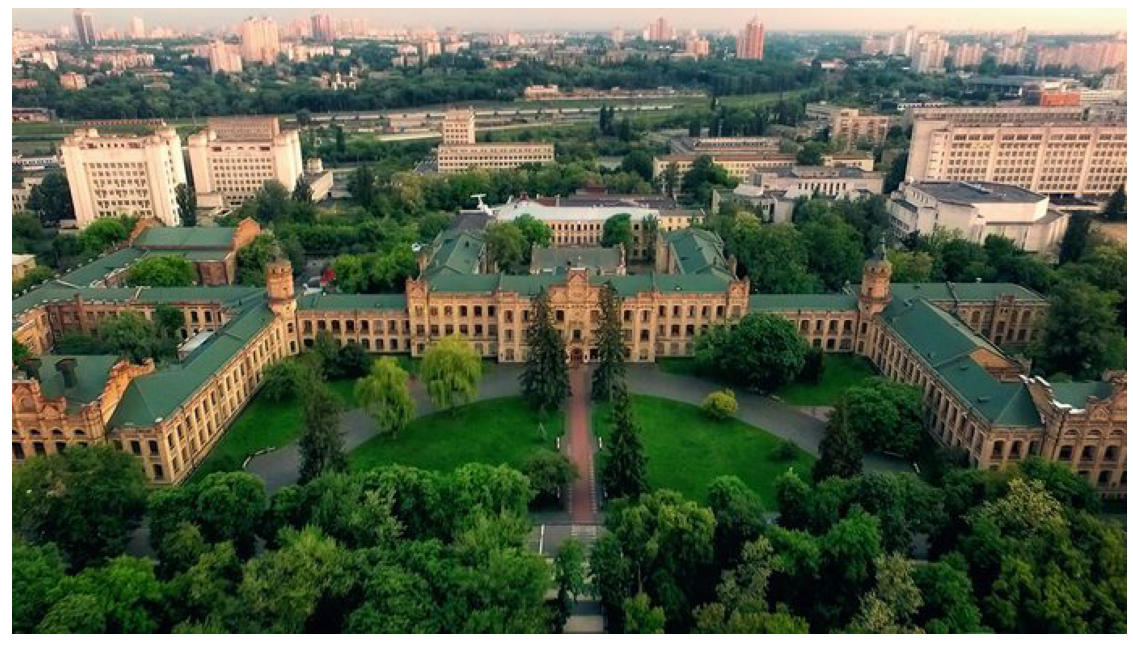

In [0]:
img = io.imread('images/1_Kyiv.jpg')
ax = plt.axes(xticks = [], yticks = [])
ax.imshow(img);

In [0]:
img_data = (img/255.0).reshape(-1,3)
img_data.shape

(267720, 3)

In [0]:
class plot_utils:
    def __init__(self, img_data, title, num_pixels=10000, colors=None):
        self.img_data = img_data
        self.title = title
        self.num_pixels = num_pixels
        self.colors = colors

    def color_space(self):
        if self.colors is None:
            self.colors = self.img_data

        rand = np.random.RandomState(42)
        index = rand.permutation(self.img_data.shape[0])[:self.num_pixels]
        colors = self.colors[index]
        R, G, B = self.img_data[index].T
        fig, ax = plt.subplots(1, 2, figsize=(12,8))
        ax[0].scatter(R, G, color=colors, marker='.')
        ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
        ax[1].scatter(R, B, color=colors, marker='.')
        ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
        fig.suptitle(self.title, size=20)

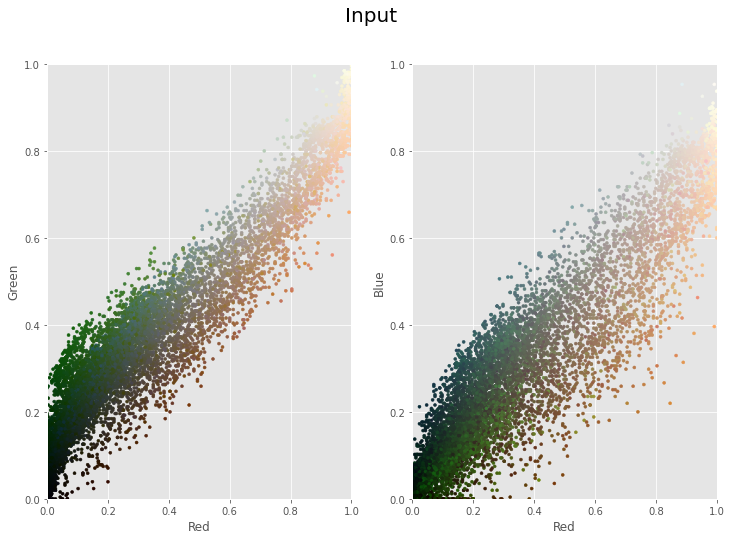

In [0]:
x = plot_utils(img_data, title = "Input")
x.color_space()

### What is that pretty pic? 

The total number of colours possible in RGB is 255\*255\*255 = 16.581.375 which is a lot. But usually in the photos not all of these colors are used. Here we can see a corelations between Green/Red and Blue/Red colors. Quite interesting how colors are similar to the colors of the photo and how the transform smoothly into one another.

### KMeans and MiniBatchKMeans

To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids

It halts creating and optimizing clusters when either:

- The centroids have stabilized — there is no change in their values because the clustering has been successful.
- The defined number of iterations has been achieved.

MiniBatchKMeans works similarly to KMeans , with one significance difference: the batch_size parameter. batch_size controls the number of randomly selected observations in each batch. The larger the the size of the batch, the more computationally costly the training process.

Our pictures are in quite high resolution, so it's better no use MiniBatch in order not to torturer the memory.

In [0]:
from sklearn.cluster import MiniBatchKMeans

In [0]:
kmeans = MiniBatchKMeans(16).fit(img_data)
k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]

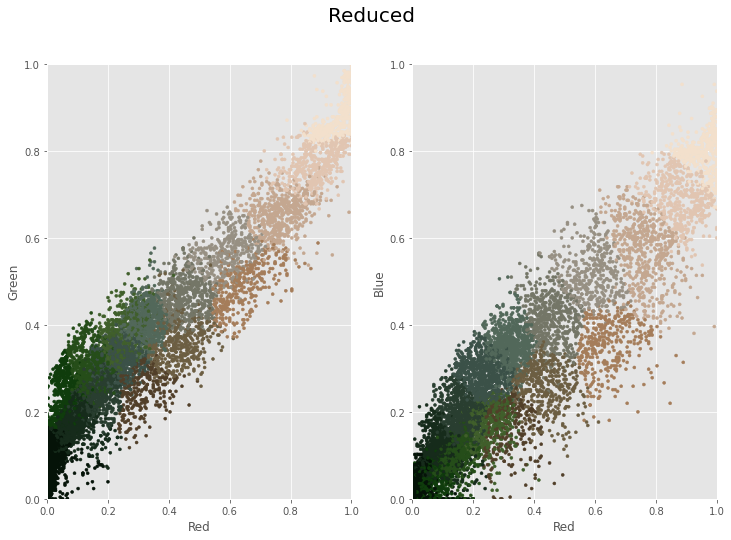

In [0]:
y = plot_utils(img_data, colors = k_colors, title = "Reduced")
y.color_space()

Just 16 colors, no more smooth transformation.

### And a result is...

In [0]:
img_dir = 'images/'

In [0]:
@interact
def color_compression(image = os.listdir(img_dir), k = IntSlider(min = 1, max = 256, step = 1, value = 16, 
                                                                 continuous_update = False, 
                                                                 layout = dict(width = '100%'))):
  input_img = io.imread(img_dir + image)
  img_data = (input_img/255.0).reshape(-1,3)

  kmeans = MiniBatchKMeans(16).fit(img_data)
  k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]
  
  k_img = np.reshape(k_colors, (input_img.shape))

  fig, (ax1, ax2) = plt.subplots(1,2)
  fig.suptitle('Image Compression', fontsize = 20)

  ax1.set_title('Original')
  ax1.set_xticks([])
  ax1.set_yticks([])
  ax1.imshow(input_img)

  ax2.set_title('Compressed')
  ax2.set_xticks([])
  ax2.set_yticks([])
  ax2.imshow(k_img)

  #plt.subplots_adjust(top = 0.55)
  plt.show()

interactive(children=(Dropdown(description='image', options=('2_Venice.jpg', '1_Kyiv.jpg', '4_Lisbon.jpg', '3_…